In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt, patches
from matplotlib import cm, colors
import lzma, pickle
import scipy

load_dir = '../Data/'
save_dir = "../Plots/"

### Setting: 

- Graph: 3-RRG, $N=10000$
- Model: Step-dSIR model
- Observation type: Sensors

In [2]:
graph=r"rrg"
d=3
N=10000

g_s = r"graph_type"
d_s = r"$d$"
N_s = r"$N$"
i_s = r"init"
D_s = r"$\Delta$"

r_s = r"$\rho$"
l_s = r"$\lambda$"
del_s = r"$\delta$"

mo0t_s = r"$\widetilde{MO}_{t=0}$"
Rmse_s = r"$R_{MSE}$"

o0t_s = r"$\widetilde{O}_{t=0}$"
Rse_s = r"$R_{SE}$"

Import data frame

In [3]:
file_name = "Fig3.4.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    data_frame = pickle.load(f)


data_frame = data_frame[(data_frame["o_type"]=="rho") & (data_frame["s_type"]=="delta")]
data_frame[r_s] = data_frame["M"]
data_frame[del_s] = data_frame["S"]

Choose initialization (random/uniform)

In [4]:
init="rnd"

In [5]:
df = data_frame[((data_frame[i_s]==init) & (data_frame[g_s]==graph) & (data_frame[d_s]==d) & (data_frame[N_s]==N))]

In [6]:
df = df[((df[l_s]== 0.4) |(df[l_s]== 0.6) |(df[l_s]== 0.8) )]
df = df[((df[r_s]== 0.) |(df[r_s]== 0.1) |(df[r_s]== 0.2) |(df[r_s]== 0.3) |(df[r_s]== 0.4) |(df[r_s]== 0.5) |(df[r_s]== 0.6) |(df[r_s]== 0.7) |(df[r_s]== 0.8) |(df[r_s]== 0.9) |(df[r_s]== 0.05) |(df[r_s]== 0.15) |(df[r_s]== 0.25) |(df[r_s]== 0.35) |(df[r_s]== 0.45) |(df[r_s]== 0.55) |(df[r_s]== 0.65) |(df[r_s]== 0.75) |(df[r_s]== 0.85) |(df[r_s]== 0.95) |(df[r_s]== 1.) )]
df = df[((df[del_s]== 0.0025) | (df[del_s]== 0.02) |(df[del_s]== 0.04) |(df[del_s]== 0.06) |(df[del_s]== 0.08) |(df[del_s]== 0.1) |(df[del_s]== 0.12) |(df[del_s]== 0.14) |(df[del_s]== 0.16) |(df[del_s]== 0.18) |(df[del_s]== 0.2) |(df[del_s]== 0.22) |(df[del_s]== 0.24) |(df[del_s]== 0.26) |(df[del_s]== 0.28) |(df[del_s]== 0.3) |(df[del_s]== 0.32) |(df[del_s]== 0.34) |(df[del_s]== 0.36) |(df[del_s]== 0.38) |(df[del_s]== 0.4) )]

In [7]:
df[D_s].replace(501,101,inplace=True)

In [8]:
df[df[l_s]==0.4][del_s].unique()

array([0.02  , 0.04  , 0.06  , 0.08  , 0.1   , 0.12  , 0.14  , 0.16  ,
       0.18  , 0.2   , 0.22  , 0.24  , 0.26  , 0.28  , 0.3   , 0.32  ,
       0.34  , 0.36  , 0.38  , 0.4   , 0.0025])

In [9]:
df[df["iteration"]==2000].iloc[:,10:30]

,seed,tol,n_iter,obs_type,snap_time,T_max,mask_type,$\mu$,tol2,it_max,$T$,$f_S$,$f_I$,$T_O$,$\Delta$,error,iteration,it_final,logL,$O_{t=0}$
253140,2,0.000001,100,sensors,-1,500,dSIR_one,0.0,0.001,2000,59,0.3034,0.0,59,1,6.3324434e-05,2000,2000,-inf,0.9974
288748,7,0.000001,100,sensors,-1,500,SI,0.0,0.001,2000,23,0.0000,1.0,23,101,5.651586e-05,2000,2000,-1146.523438,0.9976


#### Overlap

In [10]:
y_s=o0t_s
#y_s=Rmse_s

In [11]:
#DATA MANIPULATION
l_list = np.sort(df[l_s].unique())
D_list = np.sort(df[D_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_D = len(D_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_D, len_l,len_r,len_del))
D_tab = np.zeros((len_D, len_l,len_r,len_del))
l_tab = np.zeros((len_D, len_l,len_r,len_del))
r_tab = np.zeros((len_D, len_l,len_r,len_del))
d_tab = np.zeros((len_D, len_l,len_r,len_del))

for i_D,Delta in enumerate(D_list):
    for i_l,lam in enumerate(l_list):
        for i_r,rho in enumerate(r_list):
            for i_d,delta in enumerate(del_list):
                y_tab[i_D][i_l][i_r][i_d] = df[ (df[D_s]==Delta) & (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
                D_tab[i_D][i_l][i_r][i_d] = Delta
                l_tab[i_D][i_l][i_r][i_d] = lam
                r_tab[i_D][i_l][i_r][i_d] = rho
                d_tab[i_D][i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),D_s:D_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_D_lam_list = [[],[]]
for i,Delta in enumerate(D_list):
    for lam in l_list:
        df_D_lam_list[i].append( df_flat[ (df_flat[l_s]==lam) & (df_flat[D_s]==Delta)].drop(D_s,axis=1).drop(l_s,axis=1).dropna(axis=0) )

Single heatmap

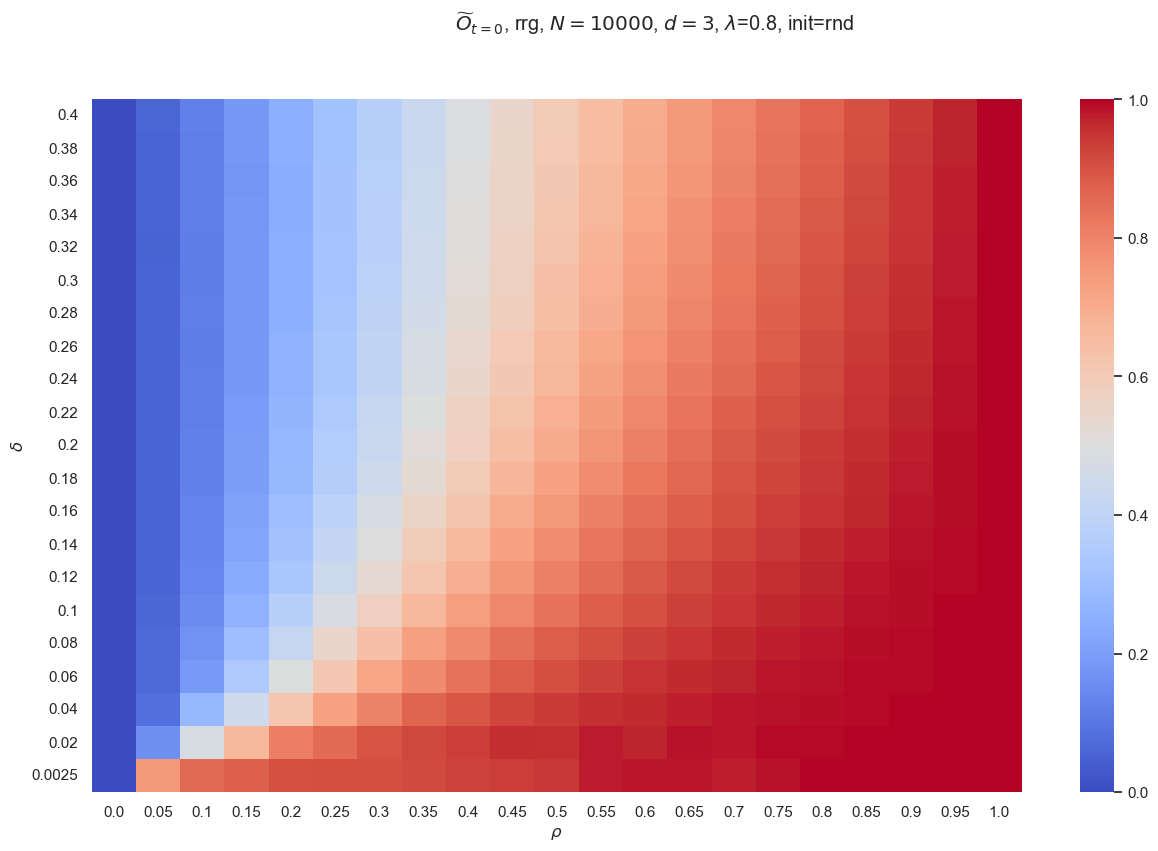

In [12]:
sns.set_theme(font_scale=1)
fig,ax = plt.subplots(figsize=(15,9))
i=1
j=2
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_D_lam_list[i][j].pivot(del_s,r_s,y_s),cmap=cm.coolwarm)
ax.invert_yaxis()

Contour plots

In [13]:
df_lam_cut=[df_D_lam_list[0][0],df_D_lam_list[0][1],df_D_lam_list[0][2],df_D_lam_list[1][0],df_D_lam_list[1][1],df_D_lam_list[1][2]]
l_cut = [l_list[0],l_list[1],l_list[2],l_list[0],l_list[1],l_list[2]]
D_cut = [1,1,1,101,101,101]
D_S = [D_s + " = 1"]*3 + ["SI"]*3

In [14]:
f_list = []
x_un_list = []
y_un_list = []
z_un_list = []
for i, df_lam in enumerate(df_lam_cut):
    x = df_lam[r_s].values
    y = df_lam[del_s].values
    z = df_lam[y_s].values
    x_un_list.append(np.unique(x))
    y_un_list.append(np.unique(y))
    z_un_list.append(df_lam[y_s].values.reshape((len(np.unique(x)),-1)))
    f_list.append(scipy.interpolate.RectBivariateSpline(x_un_list[i], y_un_list[i], z_un_list[i], s=0.01))

In [15]:
minx,maxx,miny,maxy=[0,1,0.00,0.4]
cmmin,cmmax=[0,1]
linev=[0.25,0.5,0.75,0.9]

rec_height = 0.00 + np.array([0.018,0.018,0.018,0.018,0.018,0.018])
rec_width = np.array([0.09,0.09,0.09,0.09,0.09,0.09])

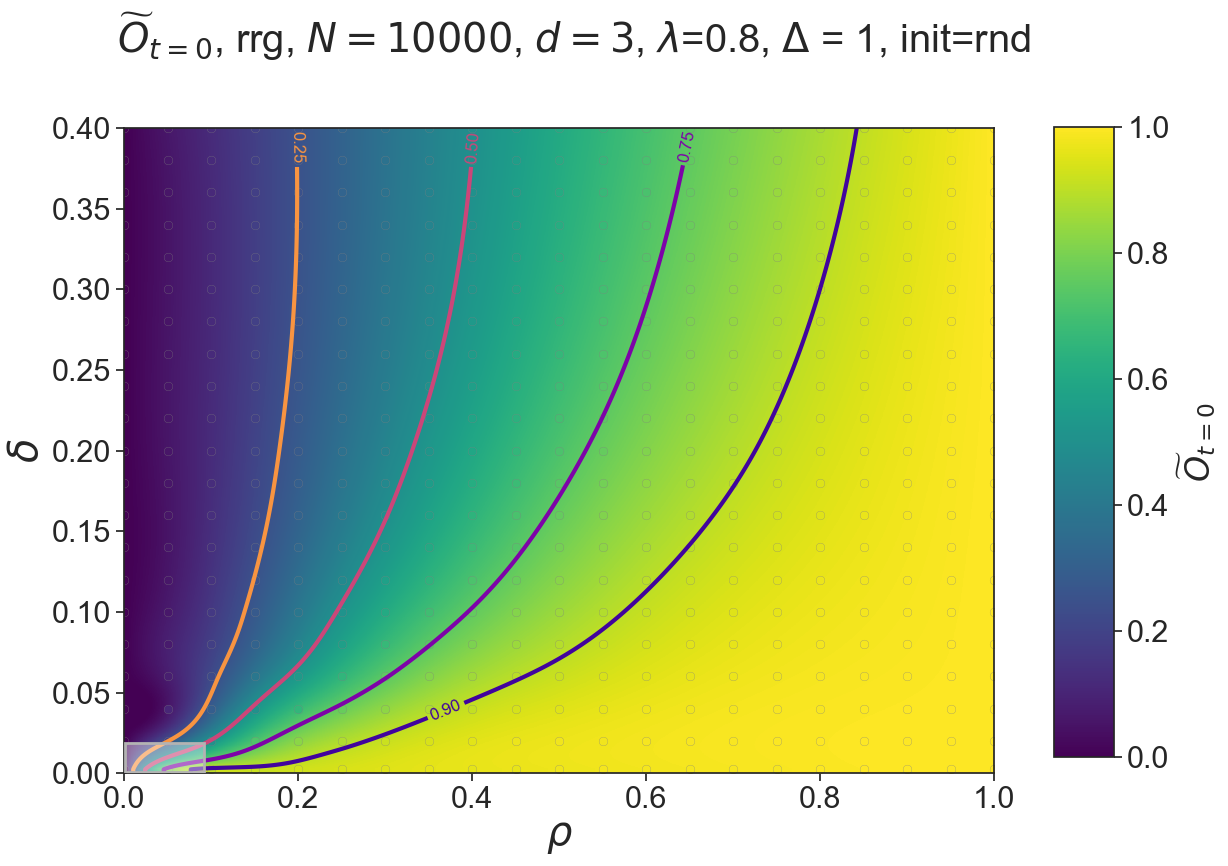

In [16]:
i=2

sns.set_theme(style="ticks", font_scale=2)
fig,ax = plt.subplots(1,1, figsize=(12,9),)
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, {l_s}={l_cut[i]}, {D_S[i]}, init={init}")
# Make data.
X1 = np.arange(minx, maxx*1.0005, maxx*0.002)
Y1 = np.arange(miny, maxy*1.0005, maxy*0.002)
#X, Y = np.meshgrid(X1, Y1)
Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
# Plot the surface.
surf = ax.imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto')
cset = plt.contour(Z, linev, linewidths=3,
                   cmap=plt.cm.plasma_r,
                   extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax)
plt.clabel(cset, inline=True, fmt='%1.2f', fontsize=12)
for i_x, x in enumerate(x_un_list[i]):
    for i_y, y in enumerate(y_un_list[i]):
        ax.scatter(x, y, s=40, color=cm.viridis(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.2)
        #pass
ax.set_xlabel(r_s, fontsize='large')
ax.set_ylabel(del_s,  fontsize='large')
ax.set_xlim([minx,maxx])
ax.set_ylim([0,maxy])
rectangle = patches.Rectangle((0.0015, 0.001), rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
ax.add_patch(rectangle)
#rectangle = patches.Rectangle((0, 0.0025), 1, 0.0175, edgecolor="grey", facecolor="grey", linewidth=0.1)
#ax.add_patch(rectangle)
# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax, label=y_s)
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

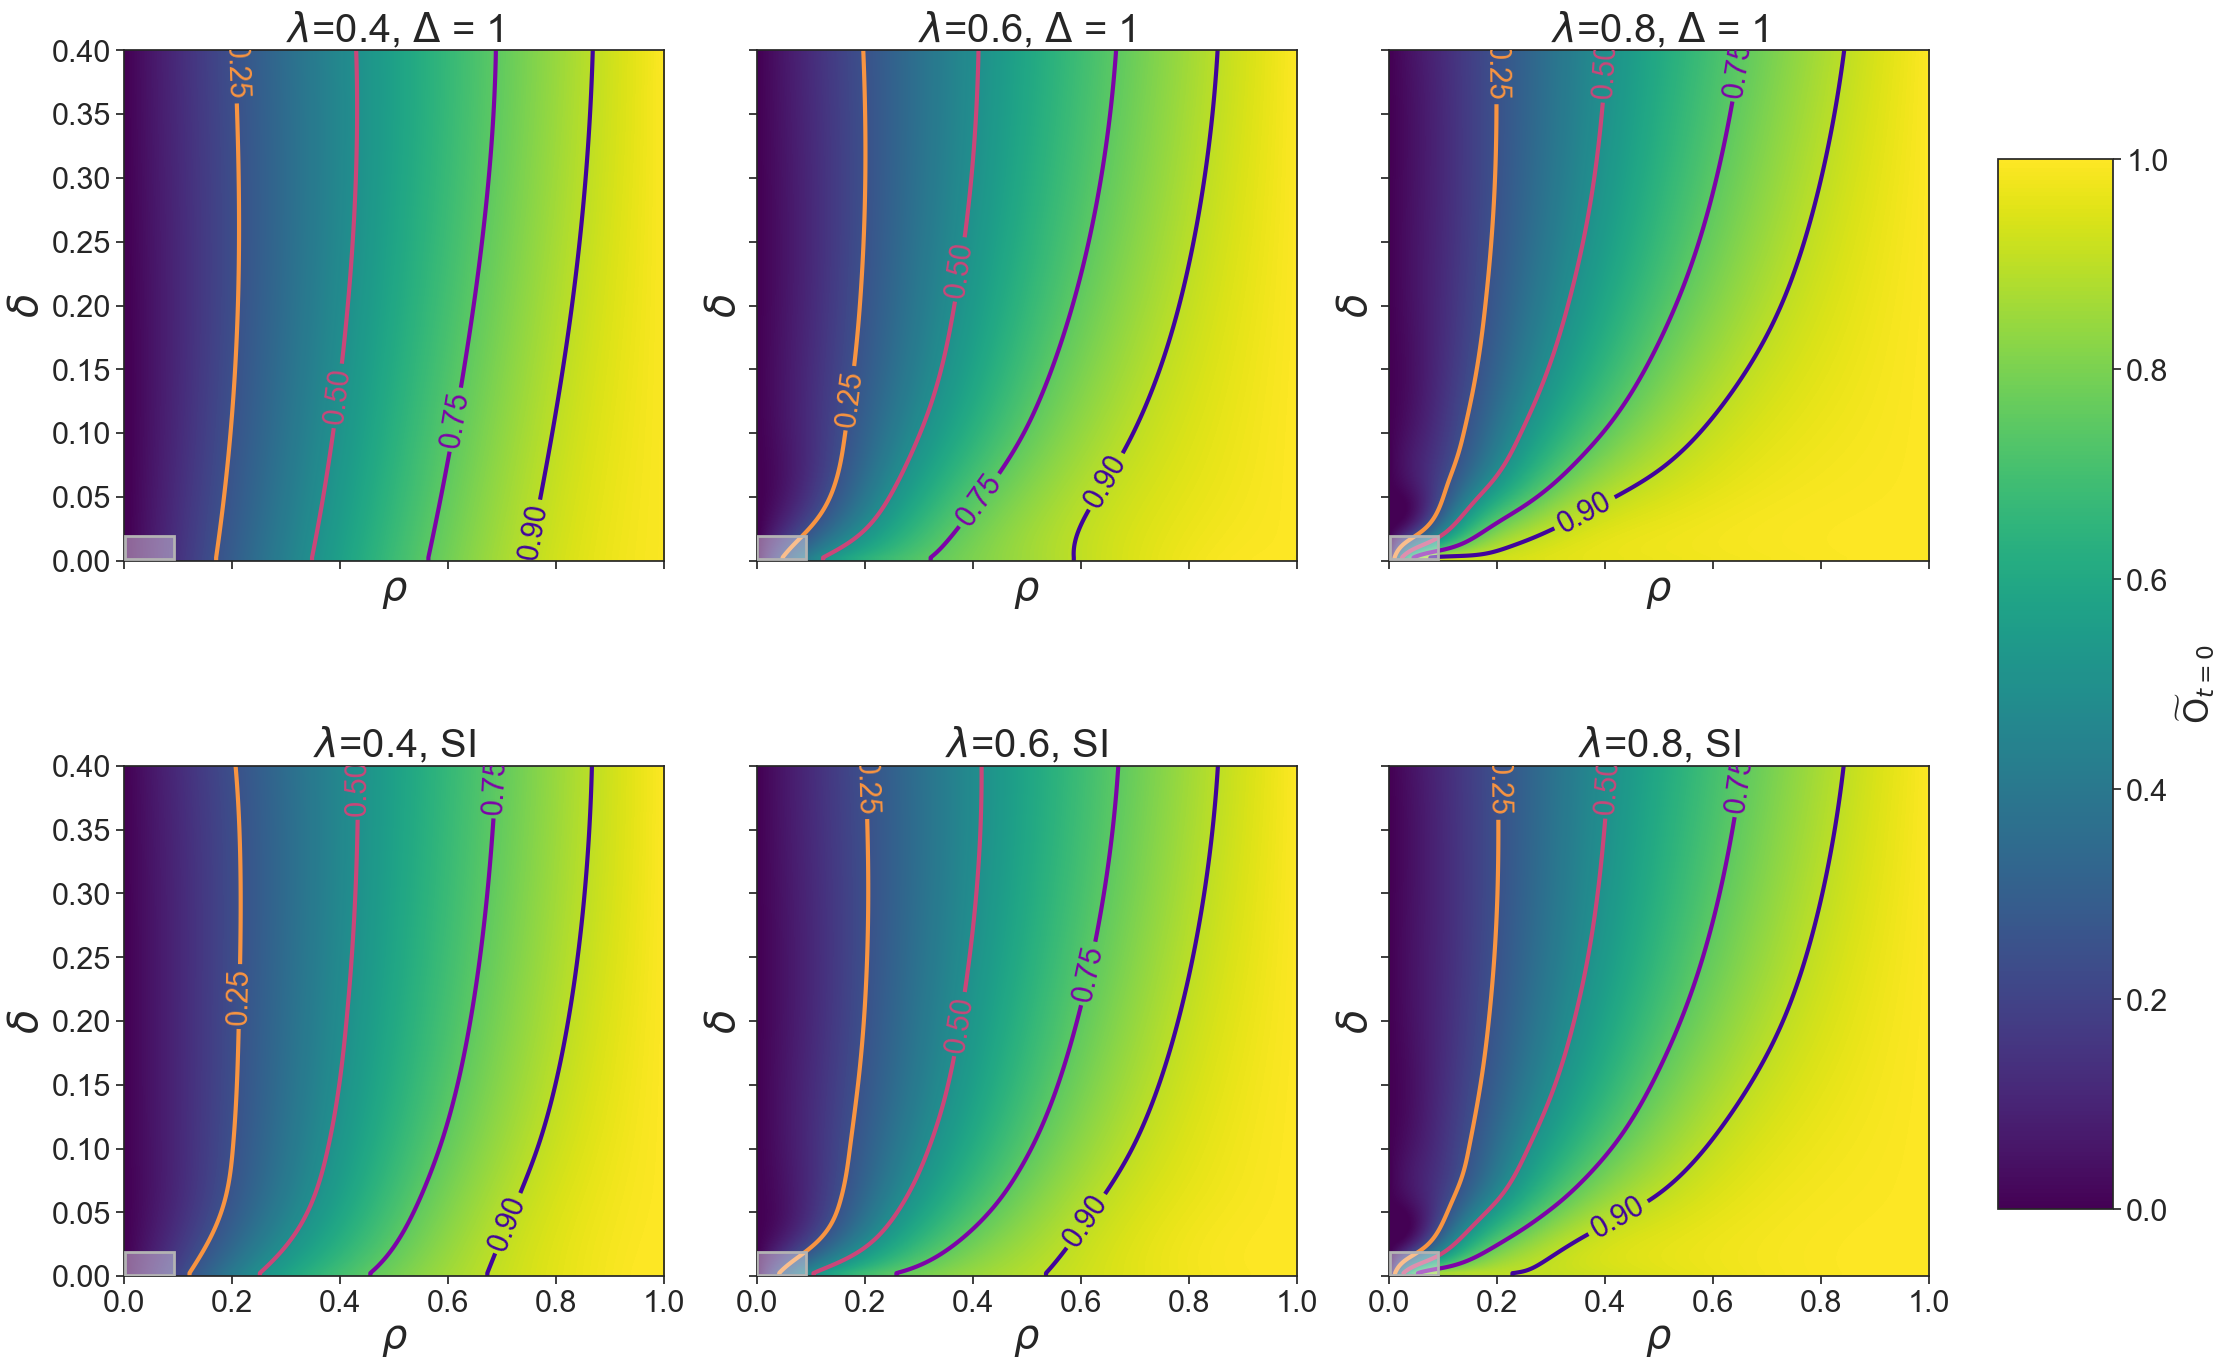

In [17]:
sns.set_theme(style="ticks",font_scale=2)
fig, axs = plt.subplots(2,3, figsize=(23,15), sharex=True, sharey=True)
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + f"init={init}")
for i in range(len(l_cut)):
    # Make data.
    X1 = np.arange(minx, maxx*1.0005, maxx*0.0015)
    Y1 = np.arange(miny, maxy*1.0005, maxy*0.0015)
    #X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
    # Plot the surface.

    #surf = axs[int(i/3)][i%3].contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)
    surf =  axs[int(i/3)][i%3].imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto',vmin=cmmin,vmax=cmmax)
    cset=(axs[int(i/3)][i%3].contour(Z, linev, linewidths=3,
                    cmap=plt.cm.plasma_r,
                    extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax))
    axs[int(i/3)][i%3].clabel(cset, inline=True, fmt='%1.2f', fontsize=21)
    #for i_x, x in enumerate(x_un_list[i]):
    #    for i_y, y in enumerate(y_un_list[i]):
    #        axs[int(i/3)][i%3].scatter(x,y, s=10, color=cm.coolwarm(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.1)

    axs[int(i/3)][i%3].set_xlabel(r_s, fontsize='large')
    axs[int(i/3)][i%3].set_ylabel(del_s,  fontsize='large')
    axs[int(i/3)][i%3].set_title(l_s + f"={l_cut[i]}, " + D_S[i],  fontsize='large')
    axs[int(i/3)][i%3].set_xlim([minx,maxx])
    axs[int(i/3)][i%3].set_ylim([0,maxy])
    rectangle = patches.Rectangle((0.0015, 0.001), rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
    axs[int(i/3)][i%3].add_patch(rectangle)
    axs[int(i/3)][i%3].set_box_aspect(0.945)
    #axs[int(i/2)][i%2].plot([0,0.2],[0.,0.2], 'k-')

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax, label=r"$\widetilde{\rm O}_{t=0}$")
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

fig.savefig(save_dir + f"Figure3.pdf")

#### MSE

In [18]:
#y_s=mo0t_s
y_s=Rse_s

In [19]:
#DATA MANIPULATION
l_list = np.sort(df[l_s].unique())
D_list = np.sort(df[D_s].unique())
r_list = np.sort(df[r_s].unique())
del_list = np.sort(df[del_s].unique())

len_l = len(l_list)
len_D = len(D_list)
len_r = len(r_list)
len_del = len(del_list)

y_tab = np.zeros((len_D, len_l,len_r,len_del))
D_tab = np.zeros((len_D, len_l,len_r,len_del))
l_tab = np.zeros((len_D, len_l,len_r,len_del))
r_tab = np.zeros((len_D, len_l,len_r,len_del))
d_tab = np.zeros((len_D, len_l,len_r,len_del))

for i_D,Delta in enumerate(D_list):
    for i_l,lam in enumerate(l_list):
        for i_r,rho in enumerate(r_list):
            for i_d,delta in enumerate(del_list):
                y_tab[i_D][i_l][i_r][i_d] = df[ (df[D_s]==Delta) & (df[l_s]==lam) & (df[r_s]==rho) & (df[del_s]==delta)][y_s].mean()
                D_tab[i_D][i_l][i_r][i_d] = Delta
                l_tab[i_D][i_l][i_r][i_d] = lam
                r_tab[i_D][i_l][i_r][i_d] = rho
                d_tab[i_D][i_l][i_r][i_d] = delta
df_flat = pd.DataFrame({r_s:r_tab.flatten(),l_s:l_tab.flatten(),D_s:D_tab.flatten(),del_s:d_tab.flatten(),y_s:y_tab.flatten()})
df_D_lam_list = [[],[]]
for i,Delta in enumerate(D_list):
    for lam in l_list:
        df_D_lam_list[i].append( df_flat[ (df_flat[l_s]==lam) & (df_flat[D_s]==Delta)].drop(D_s,axis=1).drop(l_s,axis=1).dropna(axis=0) )

Single heatmap

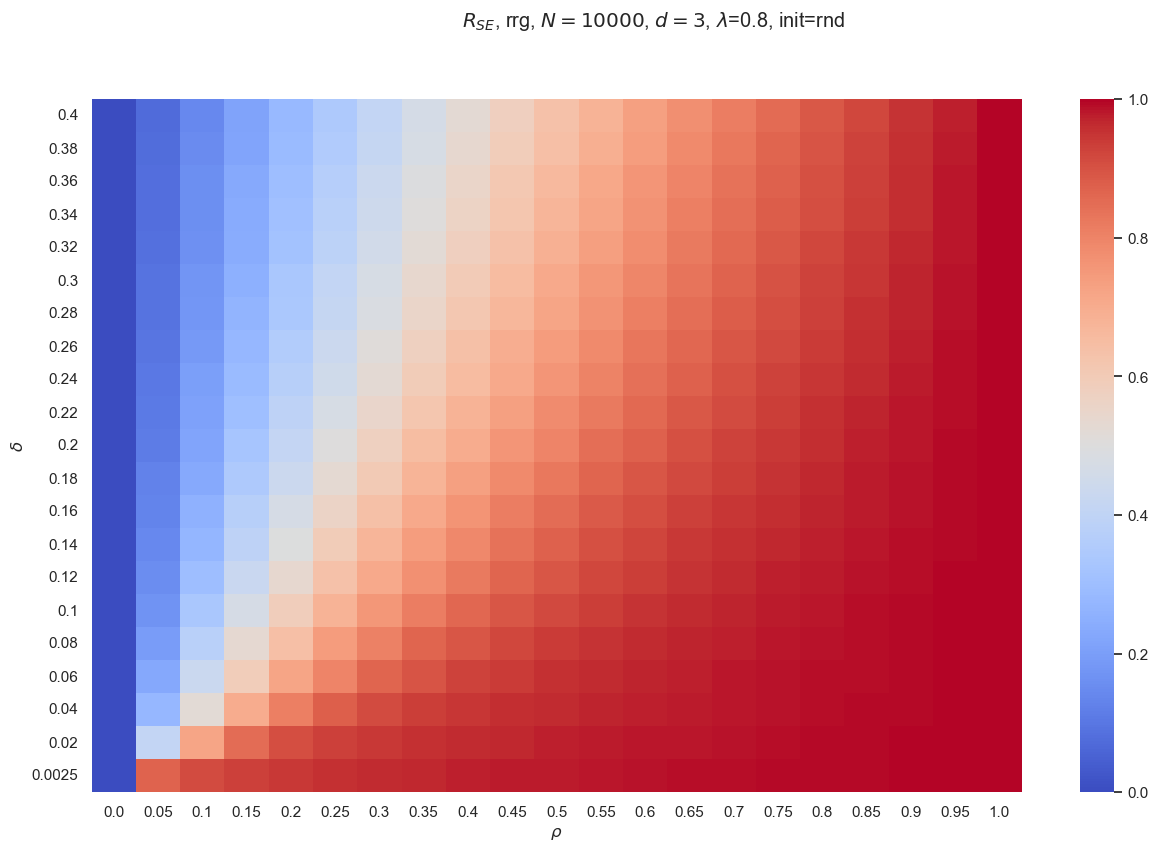

In [20]:
sns.set_theme(font_scale=1)
fig,ax = plt.subplots(figsize=(15,9))
i=1
j=2
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_D_lam_list[i][j].pivot(del_s,r_s,y_s),cmap=cm.coolwarm)
ax.invert_yaxis()

Contour plots

In [21]:
df_lam_cut=[df_D_lam_list[0][0],df_D_lam_list[0][1],df_D_lam_list[0][2],df_D_lam_list[1][0],df_D_lam_list[1][1],df_D_lam_list[1][2]]
l_cut = [l_list[0],l_list[1],l_list[2],l_list[0],l_list[1],l_list[2]]
D_cut = [1,1,1,101,101,101]
D_S = [D_s + " = 1"]*3 + ["SI"]*3

In [22]:
f_list = []
x_un_list = []
y_un_list = []
z_un_list = []
for i, df_lam in enumerate(df_lam_cut):
    x = df_lam[r_s].values
    y = df_lam[del_s].values
    z = df_lam[y_s].values
    x_un_list.append(np.unique(x))
    y_un_list.append(np.unique(y))
    z_un_list.append(df_lam[y_s].values.reshape((len(np.unique(x)),-1)))
    f_list.append(scipy.interpolate.RectBivariateSpline(x_un_list[i], y_un_list[i], z_un_list[i], s=0.01))

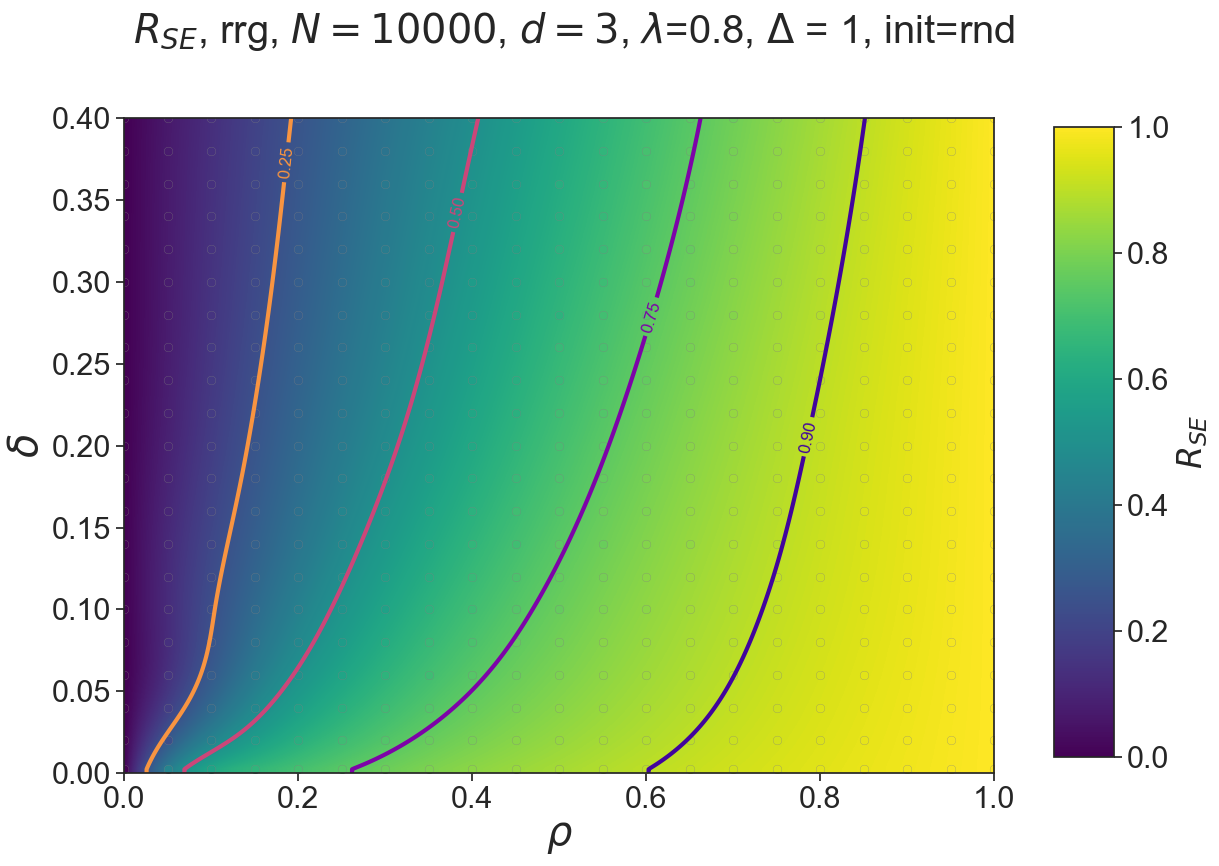

In [23]:
i=2

minx,maxx,miny,maxy=[0,1,0.00,0.4]
cmmin,cmmax=[0,1]
linev=[0.25,0.5,0.75,0.9]

rec_height = 0.00 + np.array([0.018,0.018,0.018,0.018,0.018,0.018])
rec_width = np.array([0.09,0.09,0.09,0.09,0.09,0.09])

sns.set_theme(style="ticks", font_scale=2)
fig,ax = plt.subplots(1,1, figsize=(12,9),)
plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, {l_s}={l_cut[i]}, {D_S[i]}, init={init}")
# Make data.
X1 = np.arange(minx, maxx*1.0005, maxx*0.0015)
Y1 = np.arange(miny, maxy*1.0005, maxy*0.0015)
#X, Y = np.meshgrid(X1, Y1)
Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
# Plot the surface.
surf = ax.imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto')
cset = plt.contour(Z, linev, linewidths=3,
                   cmap=plt.cm.plasma_r,
                   extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax)
plt.clabel(cset, inline=True, fmt='%1.2f', fontsize=12)
for i_x, x in enumerate(x_un_list[i]):
    for i_y, y in enumerate(y_un_list[i]):
        ax.scatter(x, y, s=40, color=cm.viridis(z_un_list[i][i_x][i_y]), edgecolors='grey', linewidths=0.2)
        #pass
ax.set_xlabel(r_s, fontsize='large')
ax.set_ylabel(del_s,  fontsize='large')
ax.set_xlim([minx,maxx])
ax.set_ylim([0,maxy])
#rectangle = patches.Rectangle((0, 0.0025), 1, 0.0175, edgecolor="grey", facecolor="grey", linewidth=0.1)
#ax.add_patch(rectangle)
# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(surf, cax=cbar_ax, label=y_s)
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

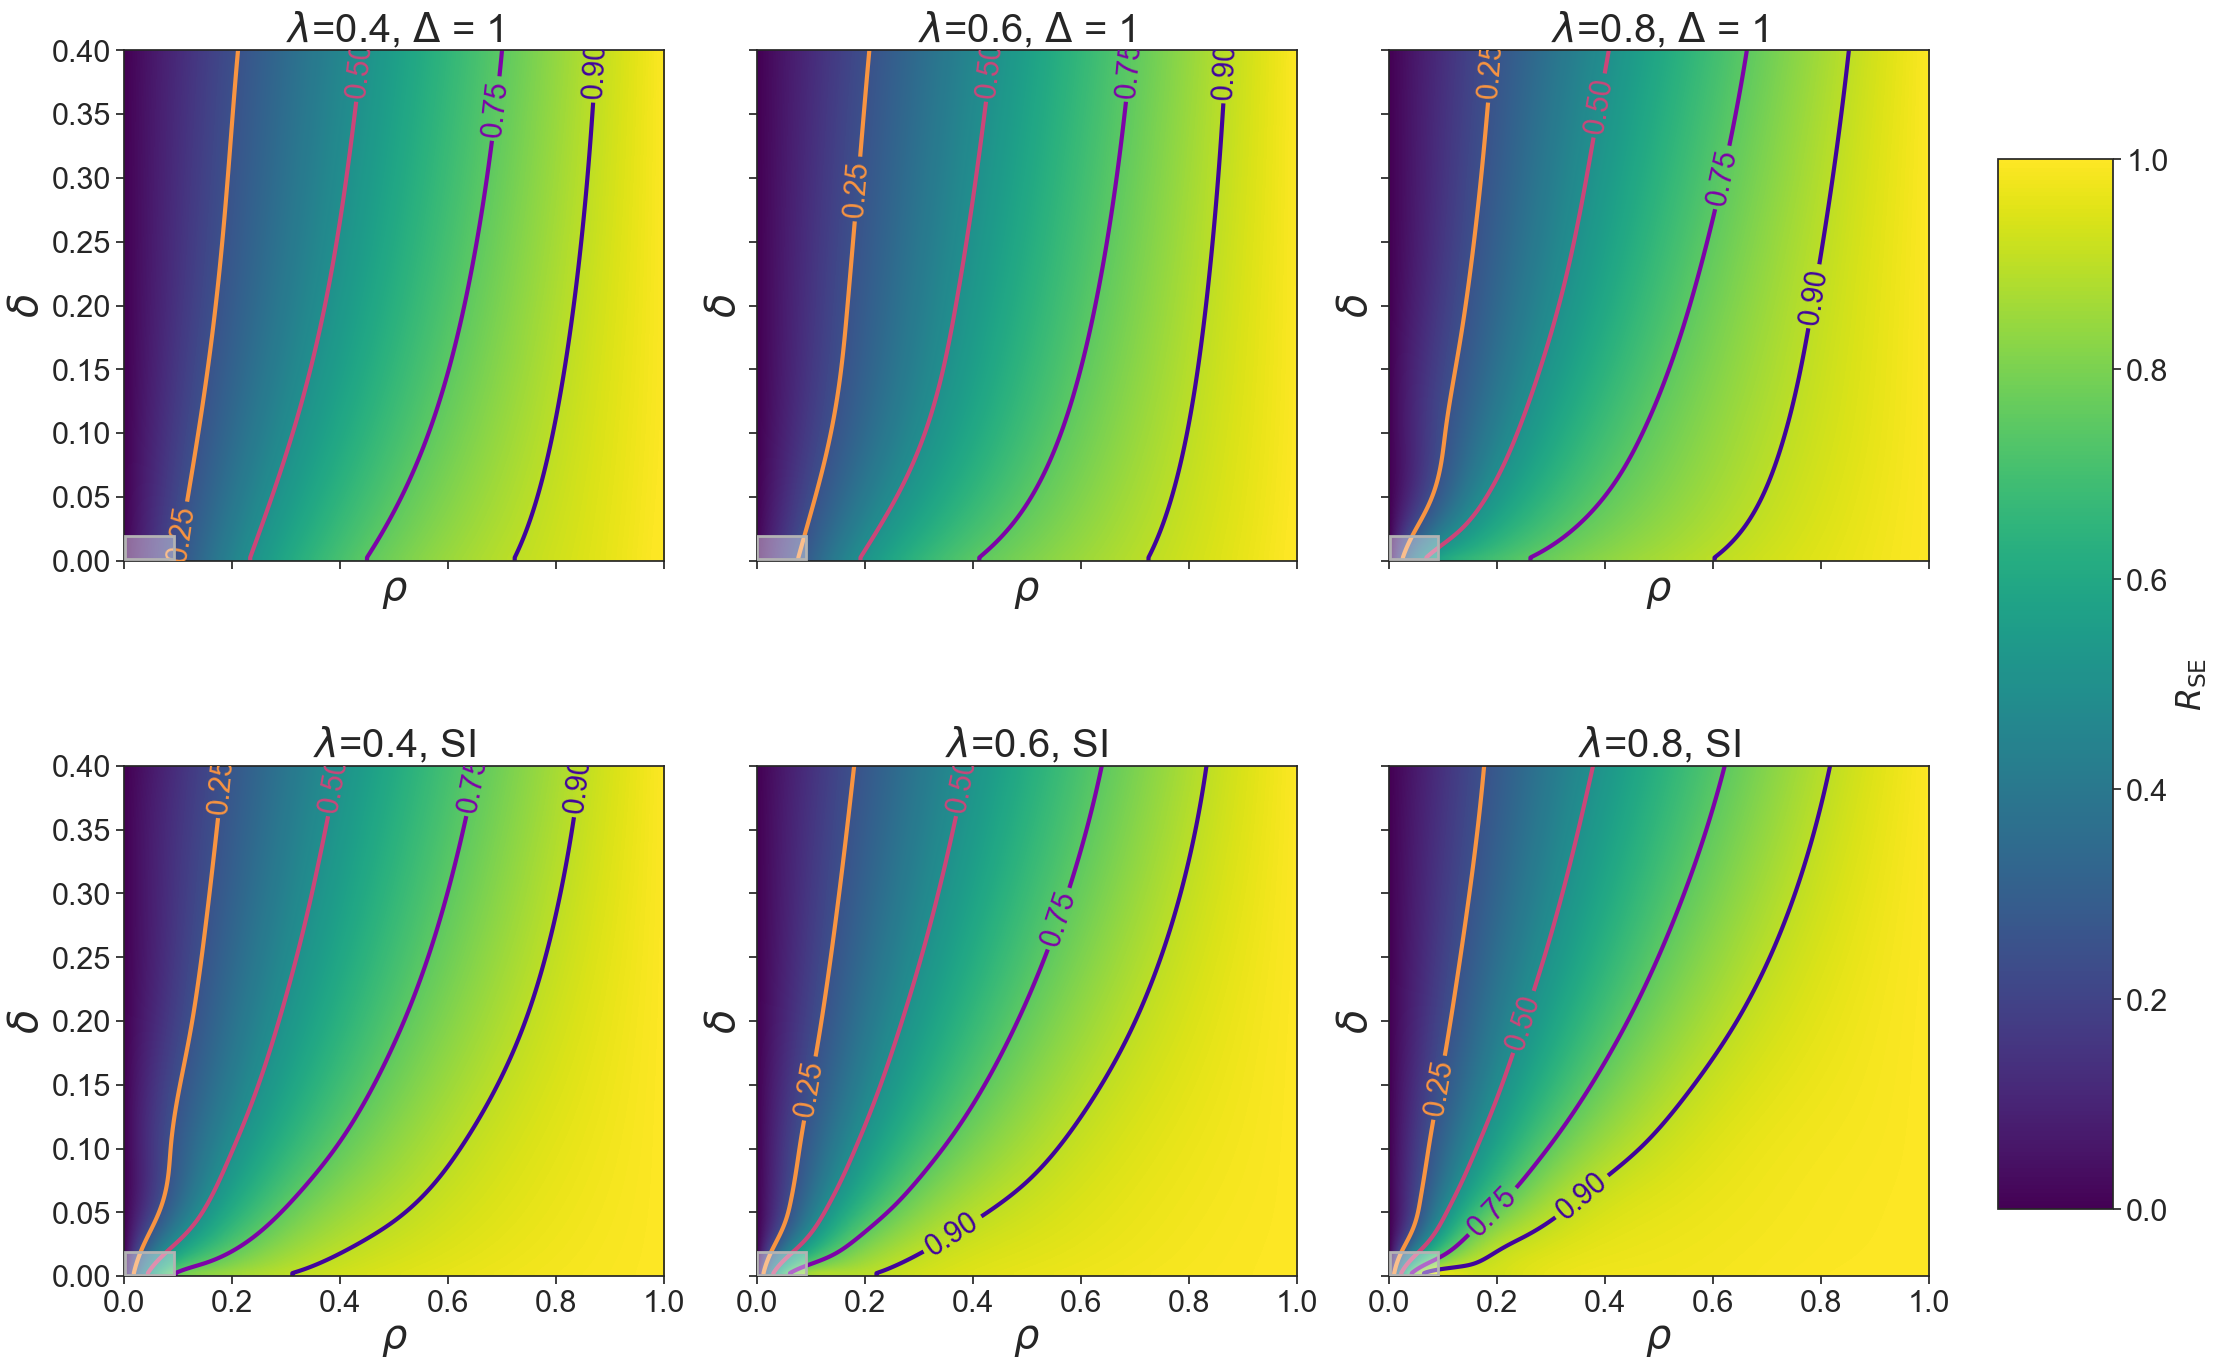

In [25]:
sns.set_theme(style="ticks",font_scale=2)
fig, axs = plt.subplots(2,3, figsize=(23,15), sharex=True, sharey=True)
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + f"init={init}")
for i in range(len(l_cut)):
    # Make data.
    X1 = np.arange(minx, maxx*1.0005, maxx*0.0015)
    Y1 = np.arange(miny, maxy*1.0005, maxy*0.0015)
    #X, Y = np.meshgrid(X1, Y1)
    Z = np.array([ np.array([ max(min(f_list[i](x,y)[0][0],cmmax),cmmin) for x in X1]) for y in Y1])
    # Plot the surface.
    surf =  axs[int(i/3)][i%3].imshow(Z, cmap=cm.viridis, extent=(minx,maxx,miny,maxy), origin='lower', aspect='auto',vmin=cmmin,vmax=cmmax)
    cset=(axs[int(i/3)][i%3].contour(Z, linev, linewidths=3,
                    cmap=plt.cm.plasma_r,
                    extent=(minx,maxx,miny,maxy),vmin=cmmin,vmax=cmmax))
    axs[int(i/3)][i%3].clabel(cset, inline=True, fmt='%1.2f', fontsize=21)


    axs[int(i/3)][i%3].set_xlabel(r_s, fontsize='large')
    axs[int(i/3)][i%3].set_ylabel(del_s,  fontsize='large')
    axs[int(i/3)][i%3].set_title(l_s + f"={l_cut[i]}, " + D_S[i],  fontsize='large')
    axs[int(i/3)][i%3].set_xlim([minx,maxx])
    axs[int(i/3)][i%3].set_ylim([0,maxy])
    rectangle = patches.Rectangle((0.0015, 0.001), rec_width[i], rec_height[i], edgecolor=(0.7,0.7,0.7,1), facecolor=(1,1,1,0.4), linewidth=2,zorder=10)
    axs[int(i/3)][i%3].add_patch(rectangle)
    axs[int(i/3)][i%3].set_box_aspect(0.945)
    #axs[int(i/2)][i%2].plot([0,0.2],[0.,0.2], 'k-')

# Add a color bar which maps values to colors.
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax, label=r"$R_{\rm SE}$")
cbar.mappable.set_clim(vmin=cmmin,vmax=cmmax)

fig.savefig(save_dir + f"Figure4.pdf")